In [ ]:
"""
الف ( ابتدا تصویر لنا را گرفته و آن را به فضای رنگ خاکستری ببرید. عکس خاکستری را نمایش دهید. )در این قسمت استفاده از
توابع آماده کتابخانه ها مجاز نیست.(
ب( تصویر را به فضا رنگ HSV ببرید و نتیجه را نمایش دهید. )"""

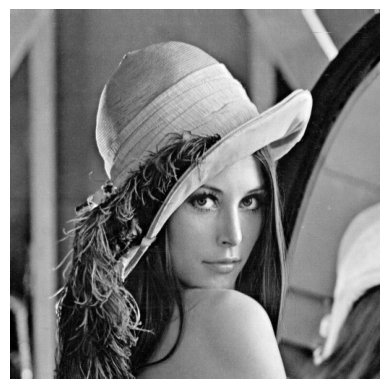

C:\Users\user\AppData\Local\Temp\ipykernel_15080\194991935.py:36: RuntimeWarning: invalid value encountered in divide
  rc= (maxx - r) / deltac
C:\Users\user\AppData\Local\Temp\ipykernel_15080\194991935.py:37: RuntimeWarning: invalid value encountered in divide
  gc= (maxx - g) / deltac
C:\Users\user\AppData\Local\Temp\ipykernel_15080\194991935.py:38: RuntimeWarning: invalid value encountered in divide
  bc= (maxx - b) / deltac


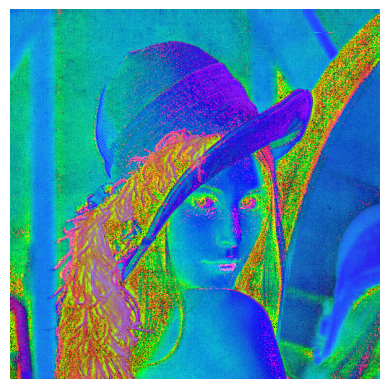

In [1]:
'''
برای تبدیل تصویر به مقیاس خاکستری از میانگین پیکسل ها استفاده میکنیم

برای تبدیل به مقیاس hsv
باید هر مولفه را جدا محاسبه کنیم

V:
نشان دهنده روشنایی رنگ است و بیشترین شدتت رنگ در پیکسل را مشخص میکند

H:
نشان دهنده رنگ واقعی ست
بر اساس تفاوت نسبی بین کانال های رنگی محاسبه میشود
به صورت زاویه ای بین 0 تا 360 درجه مقدار دهی میشود.

S:
شدت رنگ را نشان میدهد. که این مقدار از محاسبه 
اختلاف  بیشینه و کمینه مقدارهای رنگ تقسیم  به بیشینه مقدار رنگ بدست میاد
اگر بیشترین مقدار رنگ صفر باشد یعنی کاملا سیاه باشد، اشباع هم صفر است
چون تقسیم بر صفر امکان پذیر نیست و رنگی برای تعریف شدتش وجود ندارد
'''
import numpy as np
import matplotlib.pyplot as mplp
import matplotlib.image as mpli

#Question2


#Part A
# Read the image
image= mpli.imread('D:\\sadeneh\\سادنه صادقی-9913012008\\Lena\\lenna.jpg')

# convert to grayscale with mean of each pixel in rgb
grayImage= image.mean(axis=2)

# نمایش تصویر خروجی
mplp.imshow(grayImage, cmap='gray')
mplp.axis('off')  # برای حذف محور و اعداد حاشیه عکس
mplp.show()

##########################################
#Part B
#convert to rgb
#نرمال کردن مقدارها
rgbImage= image / 255.0

# convert rgb to hsv

def rgbToHsv(rgb):
    r,g,b= rgb[..., 0], rgb[..., 1], rgb[..., 2] #بدست اوردن کانال های رنگی
    #بدست اورد بیشترین مقدار و کمترین مقدار در هر پیکسل
    maxx= np.maximum(np.maximum(r, g), b) 
    minn= np.minimum(np.minimum(r, g), b)
    #VALUE
    # v in HSV is the maximum value in RGB
    v = maxx
    #اختلاف بیشترین و کمترین مقدار
    deltac= maxx - minn

    #SATURATION
    #an array for zeros
    s= np.zeros_like(maxx)
    # calculate S value only for pixels with non-zero V value, avoid dividing by zero
    s[maxx != 0]= deltac[maxx != 0] / maxx[maxx != 0]

    #HUE
    #an array for zeros
    h = np.zeros_like(maxx)
    #تعرف یک ماسک که اختلاف رنگها را نشان دهد
    mask= deltac != 0
    #h value for red channel
    rc= (maxx - r) / deltac
    #h value for green channel
    gc= (maxx - g) / deltac
    #h value for blue channel
    bc= (maxx - b) / deltac
    # adjust the value of H based on the dominant channel
    h[mask & (r== maxx)]= (bc - gc)[mask & (r== maxx)]
    h[mask & (g== maxx)]= 2.0 + (rc - bc)[mask & (g== maxx)]
    h[mask & (b== maxx)]= 4.0 + (gc - rc)[mask & (b== maxx)]

    #normalize to [0,1]
    h = (h / 6.0) % 1.0
    # combine h,s,v in order
    return np.stack((h, s, v), axis=-1)

# Convert RGB to HSV
hsvImage= rgbToHsv(rgbImage)

# Show HSV image
mplp.imshow(hsvImage)
mplp.axis('off')  # برای حذف محور و اعداد حاشیه عکس
mplp.show()
##########################################



